In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
!pip install pandas
!pip install tqdm
import pandas as pd
from tqdm import tqdm,tnrange
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [37]:
def get_data(filename):
    images = []
    label = []
    df = pd.read_csv(filename)
    for i in tnrange(df.shape[0],desc='image'):
        d = np.array(df.iloc[i][1:])
        img = d.reshape(28,28).astype('float')
        images.append(img)
        label.append(df.iloc[i][0])
    images = np.array(images).astype('float')
    label = np.array(label).astype('float')
    return images, label

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """



(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [34]:
import random 

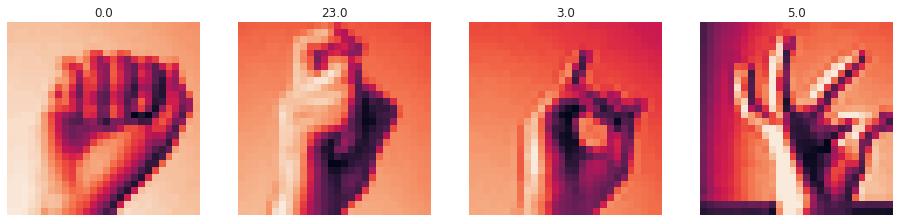

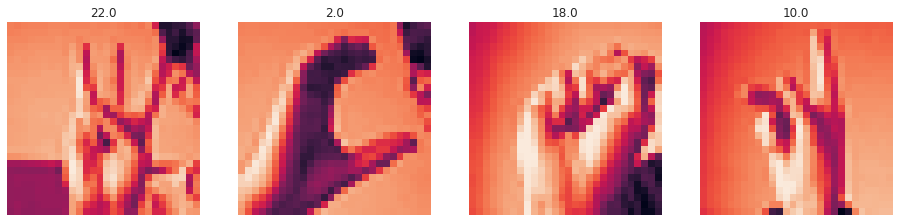

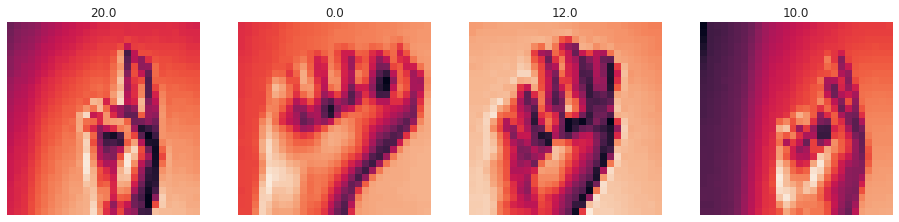

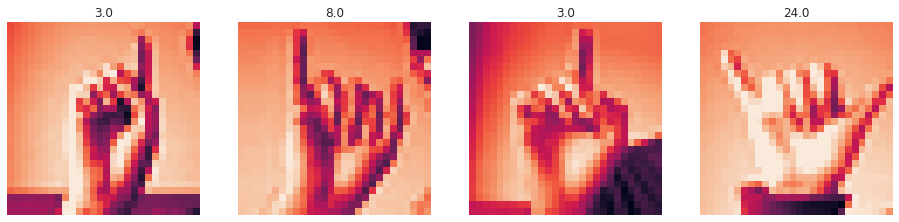

In [50]:
for j in range(4):
    plt.figure(1+j,figsize=(20,6))
    for i in range(4):
        n = random.randint(1000,20000)
        img1 = training_images[i+n]
        plt.subplot(151+i)
        plt.imshow(img1,)#cmap='binary')
        plt.title(training_labels[i+n])
        plt.axis('off')

In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims


training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [18]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

# Compile Model. 
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/15
858/857 [==============================] - 68s 79ms/step - loss: 2.8423 - accuracy: 0.1437 - val_loss: 2.0138 - val_accuracy: 0.3352
Epoch 2/15
858/857 [==============================] - 65s 76ms/step - loss: 2.0941 - accuracy: 0.3422 - val_loss: 1.3543 - val_accuracy: 0.5212
Epoch 3/15
858/857 [==============================] - 65s 76ms/step - loss: 1.7080 - accuracy: 0.4578 - val_loss: 1.0240 - val_accuracy: 0.6705
Epoch 4/15
858/857 [==============================] - 68s 79ms/step - loss: 1.4529 - accuracy: 0.5335 - val_loss: 0.9030 - val_accuracy: 0.6785
Epoch 5/15
858/857 [==============================] - 68s 79ms/step - loss: 1.2974 - accuracy: 0.5786 - val_loss: 0.7650 - val_accuracy: 0.7525
Epoch 6/15
858/857 [==============================] - 68s 79ms/step - loss: 1.1803 - accuracy: 0.6153 - val_loss: 0.7208 - val_accuracy: 0.7526
Epoch 7/15
858/857 [==============================] - 67s 78ms/step - loss: 1.0902 - accuracy: 0.6421 - val_loss: 0.7628 - val_accuracy:

[199.41793991744152, 0.65602344]

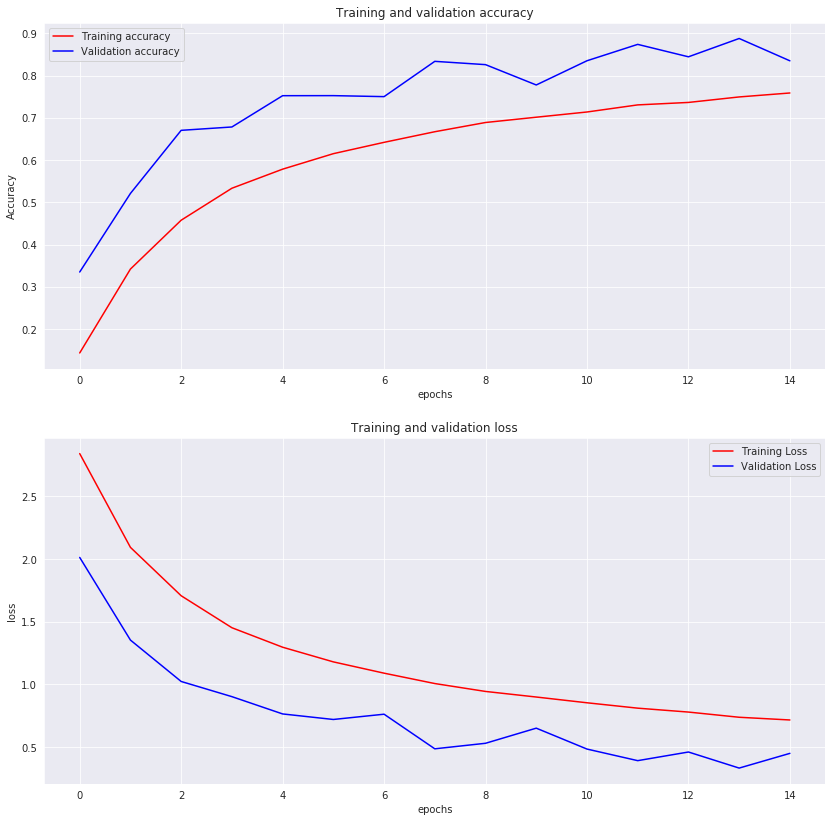

In [33]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
#!pip install seaborn
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(1,figsize=(14,14))
plt.subplot(211)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(212)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

# Submission Instructions

In [17]:
# Now click the 'Submit Assignment' button 

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [15]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);